In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('/Users/MYK/Desktop/IRES/scripts')

import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as si
import scipy.special as ss
import scipy.stats as st
from scipy.fftpack import fft, ifft
import utils as u
import fake_profile as fp
import csv

In [2]:
a1 = [2, 7, 4]
mu1 = [30, 50, 70]
sd1 = [2, 2, 2]

a2 = [4, 7, 1]
mu2 = [30, 50, 70]
sd2 = [2, 2, 2]

temp_a = fp.fake_profile(a1,mu1,sd1); temp_a.construct_profile()
temp_b = fp.fake_profile(a2,mu2,sd2); temp_b.construct_profile()

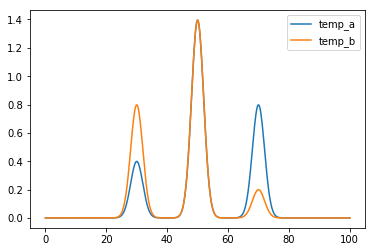

In [3]:
plt.plot(temp_a.domain, temp_a.profile, label='temp_a')
plt.plot(temp_b.domain, temp_b.profile, label='temp_b')
plt.legend()
plt.show()

# Create 1000 temp_a with noise, ks test on temp_a, plot D-statistic hist

In [4]:
nsims = 1000
temp_a_sim = [] #hold 1000 fake_profile objects
for i in range(nsims):
    instance = fp.fake_profile(a1,mu1,sd1)
    instance.construct_profile(noise=True)
    temp_a_sim.append(instance)

In [5]:
#construct cdf of temp_a, save as "temp_a.txt"
null = np.cumsum(temp_a.profile)
null = null / np.sum(null) #normalize cdf!
np.savetxt('../R_analysis/simulation_kstest/temp_a.txt', null)

In [6]:
#create 2D array of the cumulative sums
cdf = np.zeros((nsims, temp_a_sim[0].nbins))

for i in range(nsims):
    #we have negative values from when we calibrated, so take abs value. Is this VALID?
    cumsum = np.cumsum(temp_a_sim[i].profile) #abs value or not? let's not
    #normalize for cdf
    cdf[i] = cumsum / np.sum(cumsum)

#save 1000 simulated cdfs as "temp_a_sim.txt"
np.savetxt('../R_analysis/simulation_kstest/temp_a_sim.txt', cdf)

In [7]:
#read in D statistics from KS test
D_aa = np.loadtxt('../R_analysis/simulation_kstest/temp_a_sim_a_Dvalues.txt')

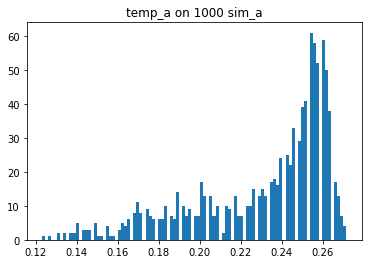

In [8]:
plt.hist(D_aa, bins=100)
plt.title("temp_a on 1000 sim_a")
plt.show()

# Create 1000 sim of temp_b with noise, ks test against temp_a, plot D

In [9]:
temp_b_sim = [] #hold 1000 fake_profile objects
for i in range(nsims):
    instance = fp.fake_profile(a2,mu2,sd2)
    instance.construct_profile(noise=True)
    temp_b_sim.append(instance)

In [10]:
#create 2D array of the cumulative sums
cdf2 = np.zeros((nsims, temp_b_sim[0].nbins))

for i in range(nsims):
    #we have negative values from when we calibrated, so take abs value. Is this VALID?
    cumsum = np.cumsum(temp_b_sim[i].profile) #abs value or not? let's not
    #normalize for cdf
    cdf2[i] = cumsum / np.sum(cumsum)

#save 1000 simulated cdfs as "temp_b_sim.txt"
np.savetxt('../R_analysis/simulation_kstest/temp_b_sim.txt', cdf2)

In [11]:
#read in D statistic 
D_ab = np.loadtxt('../R_analysis/simulation_kstest/temp_a_sim_b_Dvalues.txt')

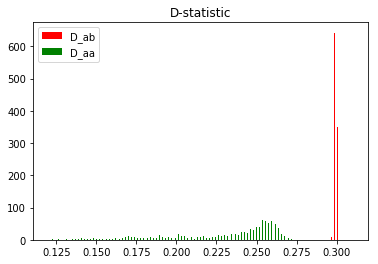

In [28]:
bins = np.linspace(.12,.31,300)
plt.hist(D_ab,bins,label='D_ab',color='r')
plt.hist(D_aa,bins,label='D_aa',color='g')
plt.title("D-statistic")
plt.legend()
plt.show()